In [1013]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [1014]:
df = pd.read_csv('zad3_Stroke.csv', sep=';', decimal=',')
display(df)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,NaN,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0.0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
395,Female,58.0,0,0.0,Yes,NaN,Rural,69.12,28.3,Unknown,0
396,Female,79.0,0,0.0,No,Private,Urban,253.86,28.8,formerly smoked,0
397,Female,46.0,0,0.0,Yes,Govt_job,Urban,NaN,27.8,never smoked,0
398,Male,13.0,0,0.0,No,children,Urban,NaN,24.3,Unknown,0


In [1015]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease        float64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [1016]:
df['heart_disease'].fillna(df['heart_disease'].interpolate(), inplace=True)
df['avg_glucose_level'].fillna(df['avg_glucose_level'].interpolate(), inplace=True)
df['bmi'].fillna(df['bmi'].interpolate(), inplace=True)

In [1017]:
df['stroke'].value_counts()

1    200
0    200
Name: stroke, dtype: int64

In [1018]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_columns = [col for col in df.columns if col not in categorical_columns + ['stroke']]
x_numeric = df[numerical_columns]
x_categorical = df[categorical_columns]

encoder = LabelEncoder()
x_categorical_encoded = x_categorical.apply(encoder.fit_transform)

x = pd.concat([x_numeric, x_categorical_encoded], axis=1)
df.drop(['stroke'], axis=1)
y = df['stroke']

In [1019]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [1020]:
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Dokładność modelu w zbiorze uczącym: {accuracy_train}')
print(f'Dokładność modelu w zbiorze testowym: {accuracy_test}')

Dokładność modelu w zbiorze uczącym: 1.0
Dokładność modelu w zbiorze testowym: 0.75


Postać drzewa decyzyjnego:

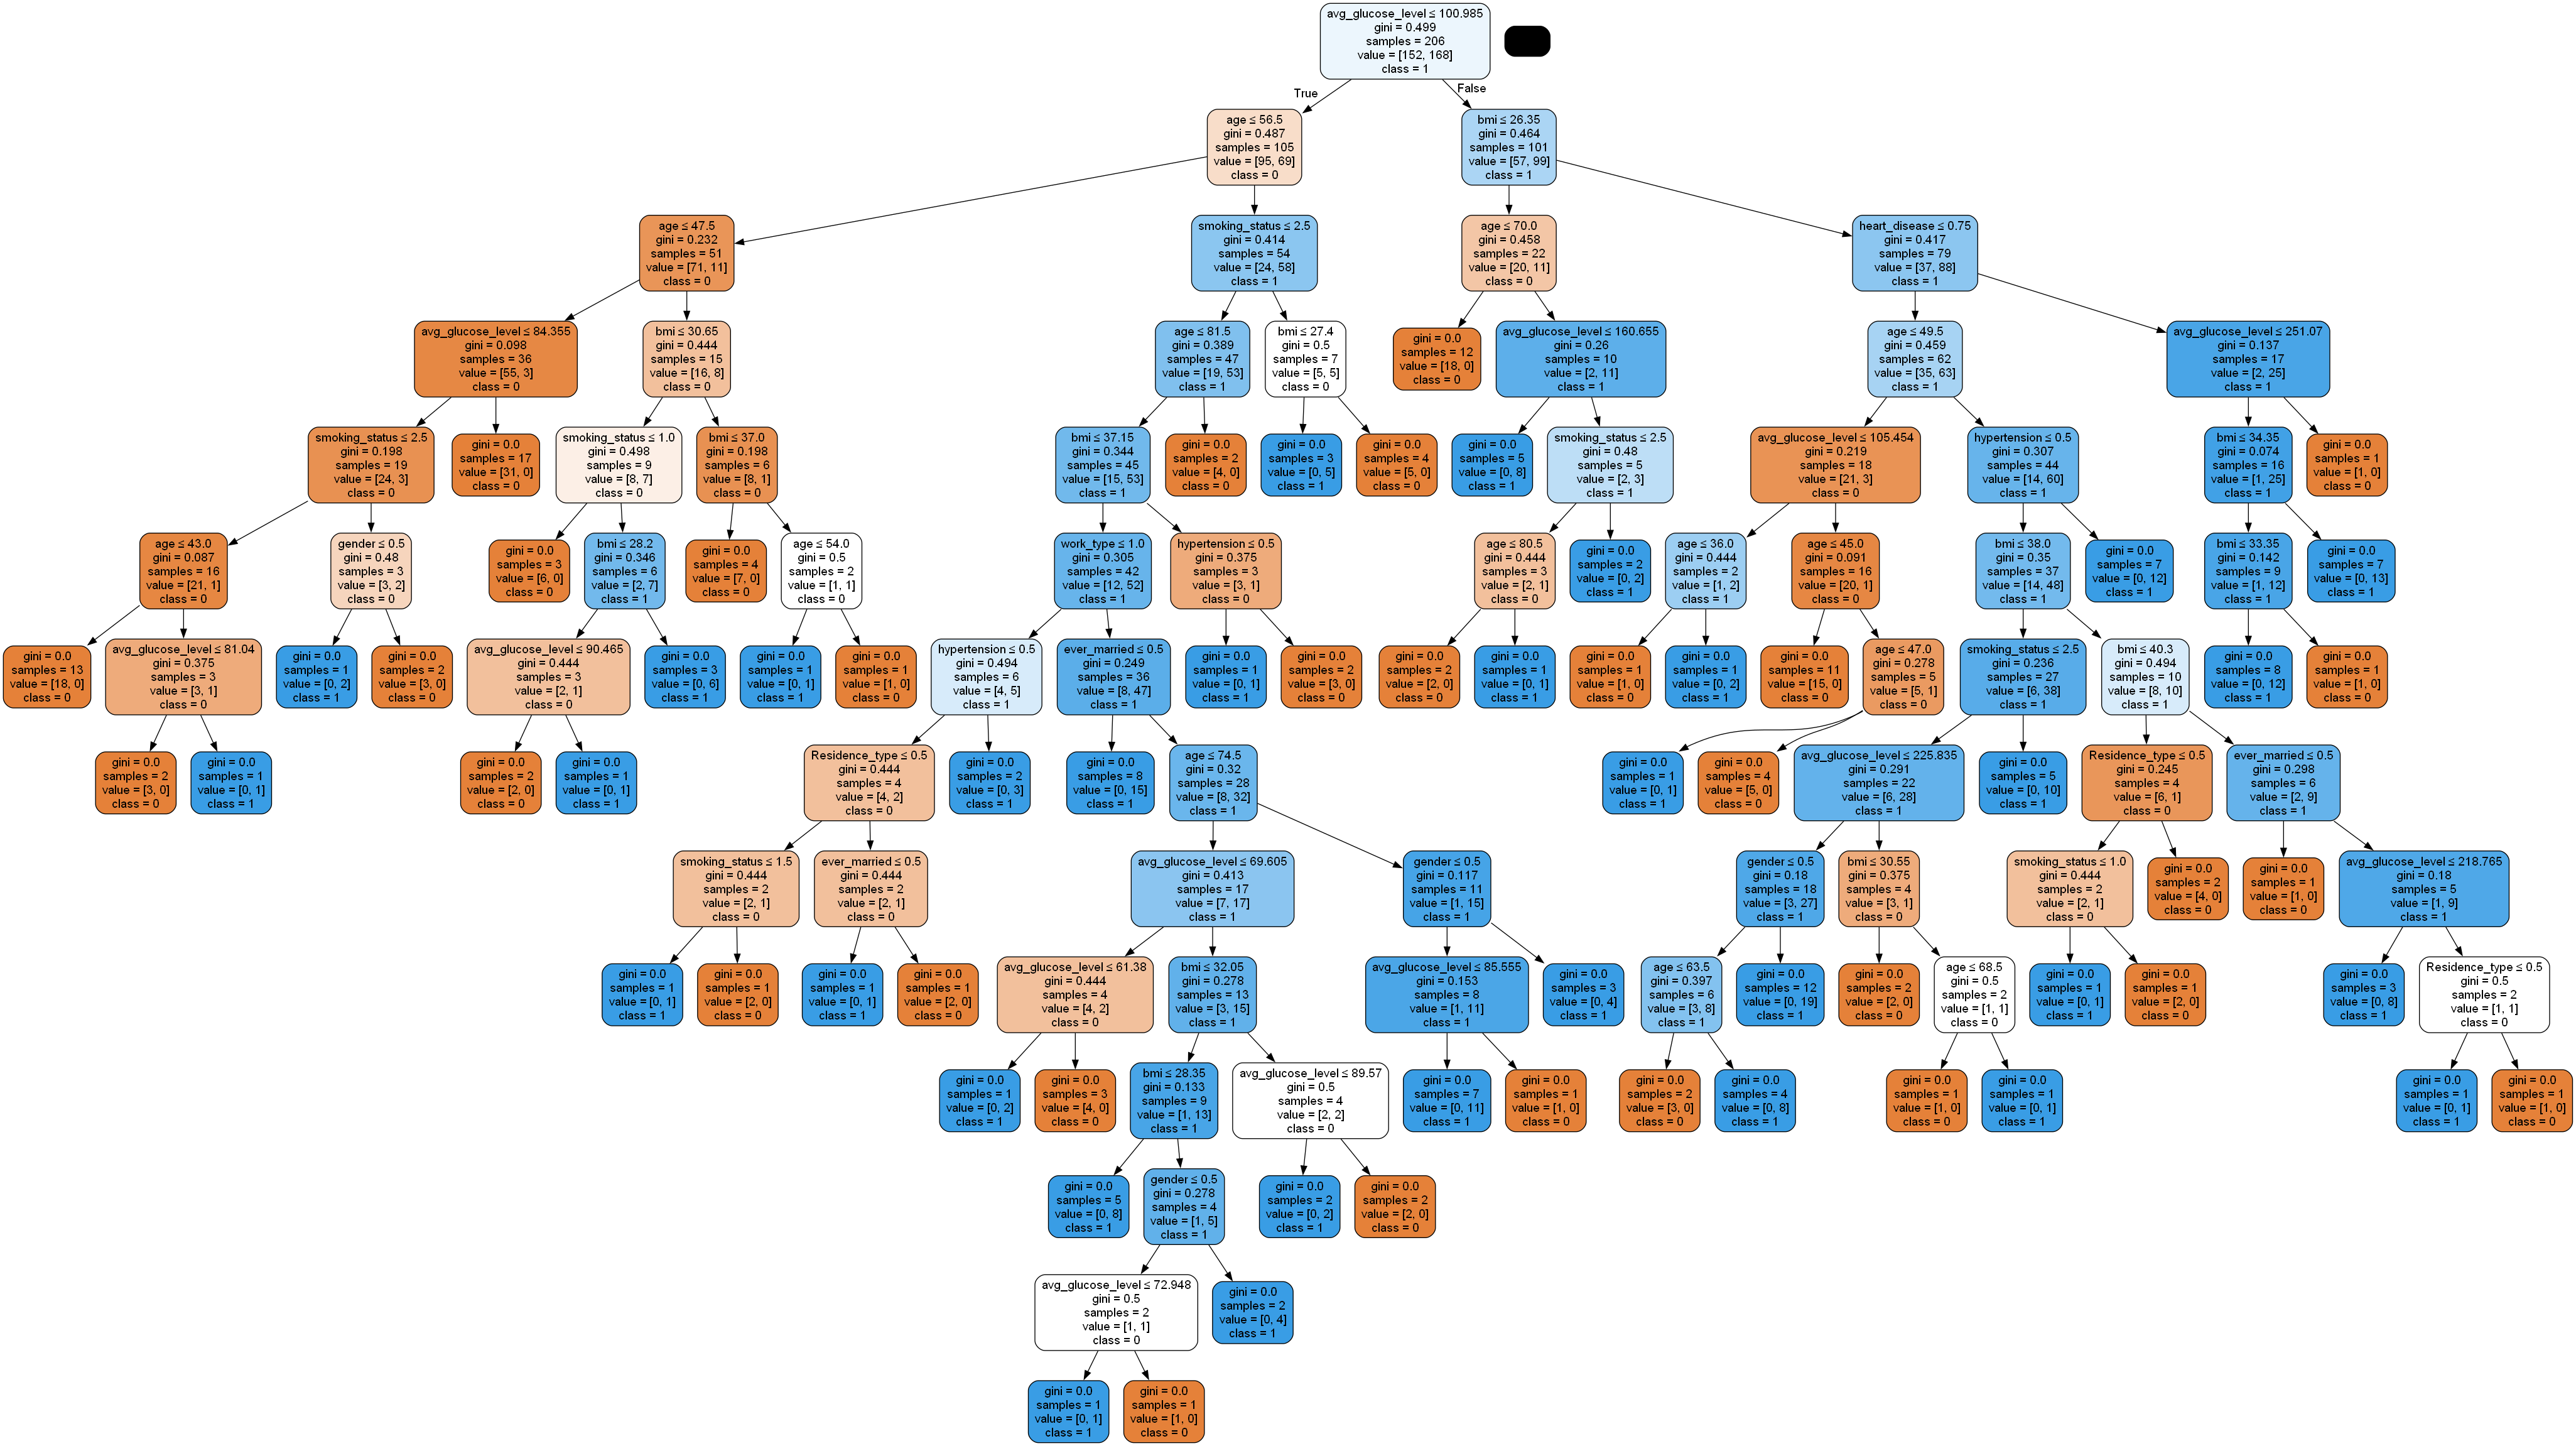

In [1021]:
tree = model.estimators_[5]
class_names = list(map(str, model.classes_))
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=list(X_train.columns),
                           class_names=class_names,
                           filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Drzewo decyzyjne z ustaloną maksymalną głębokością (wyniki na zbiorze uczącym i testowym):

In [1022]:
model2 = RandomForestClassifier(n_estimators=40, max_depth=10)
model2.fit(X_train, y_train)

y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Dokładność modelu - zbiór uczący: {accuracy_train}')
print(f'Dokładność modelu - zbiór testowy: {accuracy_test}')

Dokładność modelu - zbiór uczący: 1.0
Dokładność modelu - zbiór testowy: 0.7625


Postać drzewa decyzyjnego

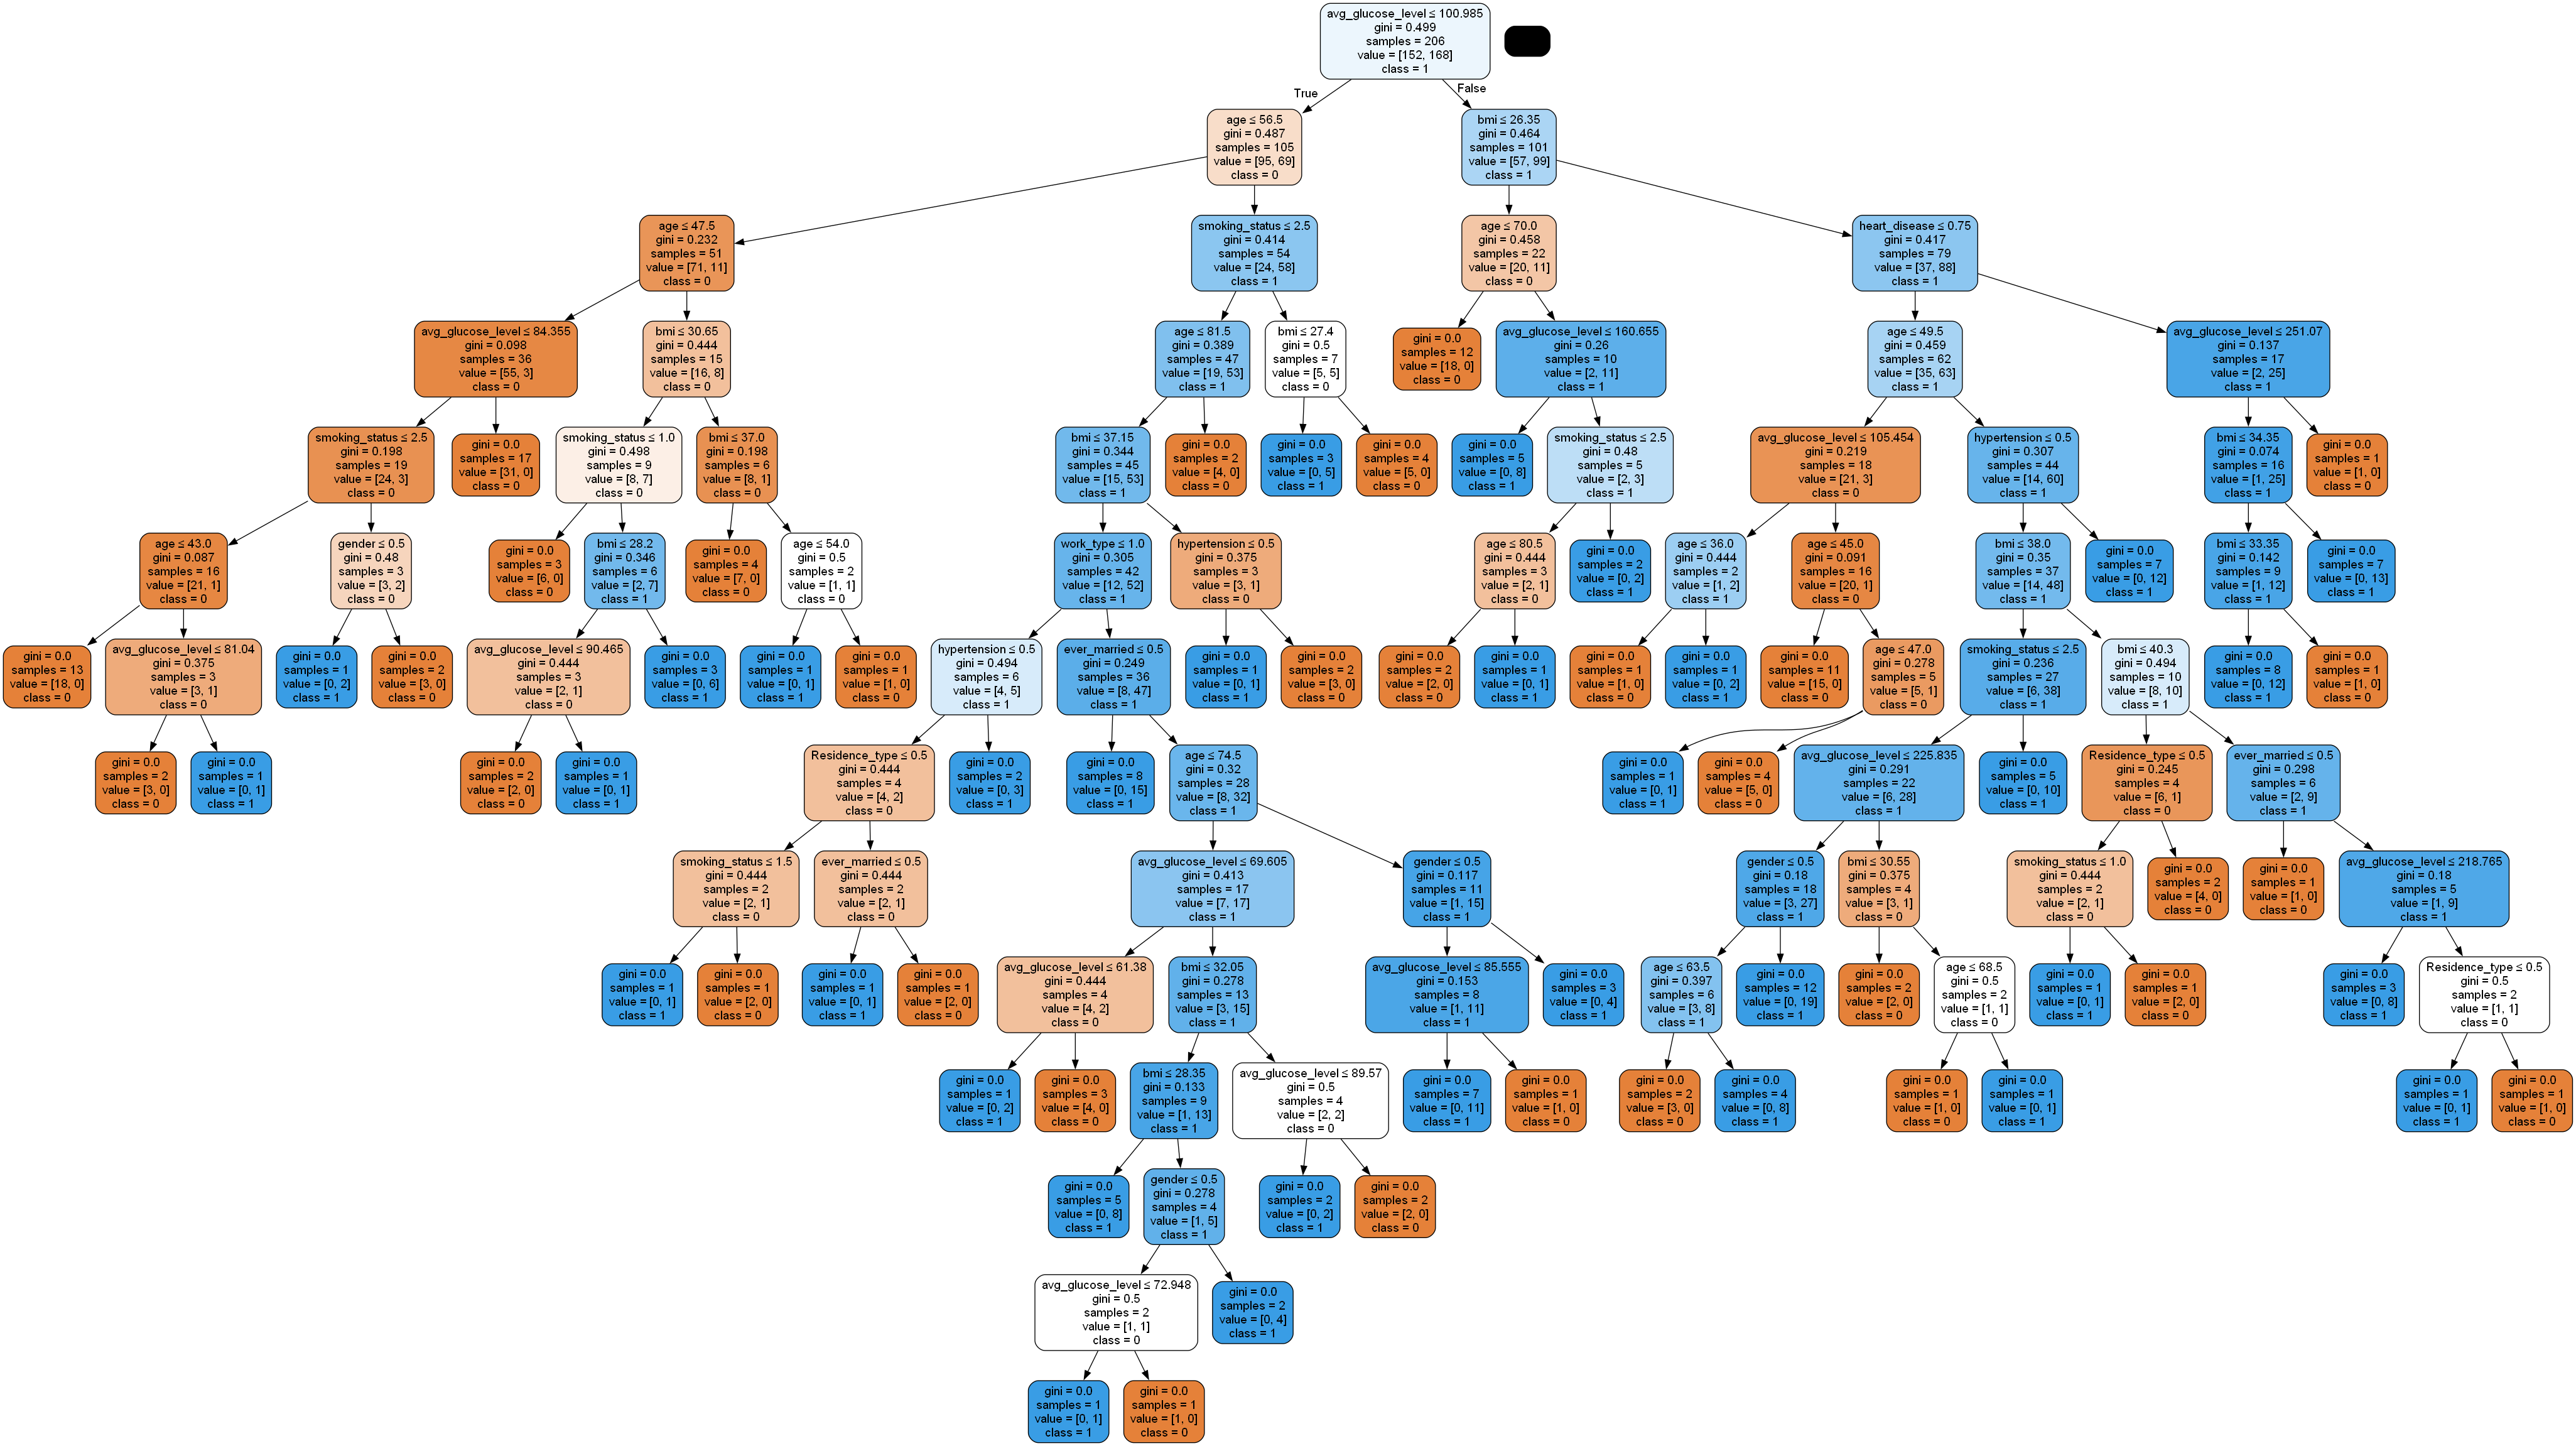

In [1023]:
tree2 = model2.estimators_[16]
class_names2 = list(map(str, model2.classes_))
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=list(X_train.columns),
                           class_names=class_names2,
                           filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Wyliczenie specyficzności modelu:

In [1024]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]

specificity = true_negatives / (true_negatives + false_positives)
print(f'Specificity: {specificity}')

Specificity: 0.6410256410256411


Macierz błędów na zbiorze uczącym

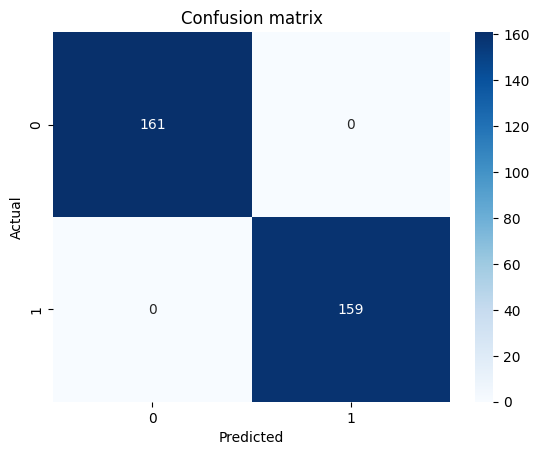

In [1025]:
conf_matrix = confusion_matrix(y_train, y_pred_train)
conf_matrix_with_labels = pd.DataFrame(conf_matrix, columns=[0, 1], index=[0, 1])
sns.heatmap(conf_matrix_with_labels, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [1026]:
print("Zbiór uczący")
report = classification_report(y_train, y_pred_train)
print(report)
print("Zbiór testowy:")
report = classification_report(y_test, y_pred_test)
print(report)

Zbiór uczący
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       159

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

Zbiór testowy:
              precision    recall  f1-score   support

           0       0.83      0.64      0.72        39
           1       0.72      0.88      0.79        41

    accuracy                           0.76        80
   macro avg       0.78      0.76      0.76        80
weighted avg       0.78      0.76      0.76        80



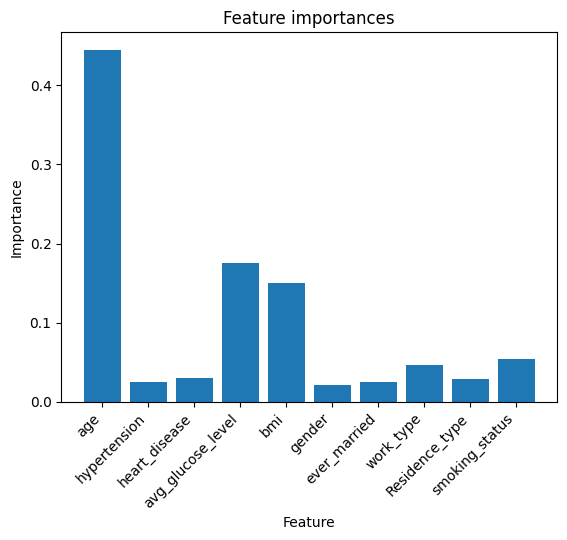

In [1027]:
importance = model2.feature_importances_
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X_train.columns, rotation=45, ha="right")
plt.title("Feature importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()